## Колчина Анастасия

# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ &mdash; столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ &mdash; столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением &mdash; то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N &mdash; количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов, в $n$ различных моментов времени &mdash; это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ &mdash; это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них &mdash; о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором &mdash; тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом &mdash; $n$ точек (значения аргумента $x$), во втором &mdash; значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача &mdash; по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [36]:
import numpy
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
data_train = numpy.loadtxt('train.txt', delimiter=',')
data_test = numpy.loadtxt('test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [38]:
X_train = data_train[:,0]
y_train = data_train[:,1]
X_test = data_test[:,0]
y_test = data_test[:,1]
# Сделайте то же для тестовой выборки

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [39]:
n = numpy.size(X_train)
X_ones = numpy.ones((n, 1))
X = numpy.concatenate((numpy.array([X_train]).T, X_ones), axis=1)
y = numpy.array([y_train]).T
pseudo = (sla.inv((X.T).dot(X)).dot(X.T)).dot(y)
k = pseudo[0, 0]
b = pseudo[1, 0]
print('y = ', k, 'x + ', b, sep='')

y = 2.2791344980519463x + 4.433230905064935


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

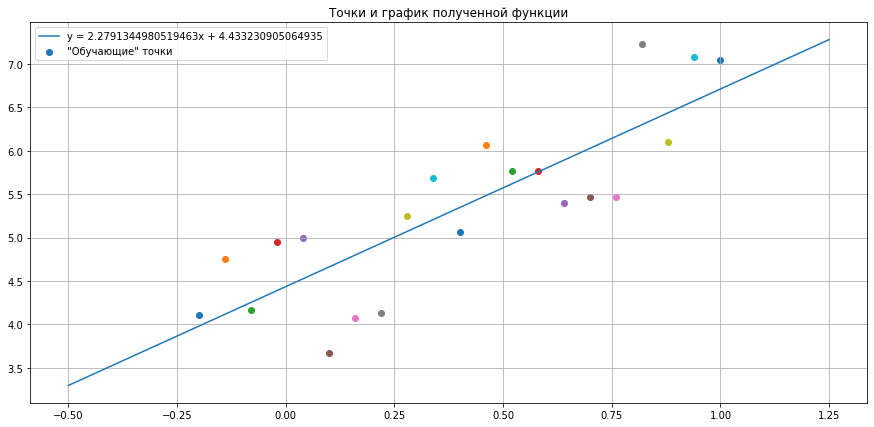

In [40]:
plt.figure(num=1, figsize=(15, 7))
plt.title("Точки и график полученной функции")
plt.grid()
x = numpy.linspace(-0.5, 1.25, 50)
y = 2.2791344980519463*x + 4.433230905064935
plt.plot(x, y, label='y = 2.2791344980519463x + 4.433230905064935')
plt.scatter(X_train[0], y_train[0], label='"Обучающие" точки')
for i in range (1, n):
    plt.scatter(X_train[i], y_train[i])
plt.legend(loc='upper left')
plt.show()

**Мой ответ:** функцию по значениям в n точках лучше всего приблизить многочленом n-1 степени, поскольку по n точкам можно задать многочлен n-1 степени таким образом, что его график будет проходить через них. Рассмотрим СЛУ для поиска коэффицентов многочлена, она будет иметь вид: Xa = y, где X состоит из вектор-столбцов x со степенями от n-1 до 0 включительно и имеет размер n x n; a - столбец коэффицентов; y - вектор-столбец значений y. Определитель матрицы X представляет собой определитель Вандермонда со знаком перестановки столбцов, и, как мы знаем, определитель Вандермонда не равен 0. Следовательно, X имеет полный ранг и помним, что матрица является квадратной - значит, X невырождена и решение СЛУ единственно. Значит, и MSE будет у такого многочлена нулевая, поскольку система совместна. Правда, полученная модель не будет иметь никакого практического смысла, поскольку работает точно только на обучающих данных.

Тогда получается, что полученную функцию лучше всего приблизить многочленом 20 степени (т.к. у нас 21 точка), и МНК нам для этого не понадобится, поскольку, как мы уже выяснили, решение СЛУ единственно. Поэтому воспользуемся стандартной функцией решения СЛУ.

In [41]:
n = numpy.size(X_train)
X_ones = numpy.ones((n, 1))
X = numpy.concatenate((numpy.array([X_train]).T, X_ones), axis=1)
y = numpy.array([y_train]).T
base = numpy.array([X_train]).T
for i in range (2, 21):
    base *= numpy.array([X_train]).T
    X = numpy.concatenate((base, X), axis=1)
a = numpy.squeeze(sla.solve(X, y))
print('Коэффиценты многочлена выведены от младшей степени к старшей:')
for i in range (n-1, -1, -1):
    print(a[i])

Коэффиценты многочлена выведены от младшей степени к старшей:
3.229612476267544
-0.6898106348162606
3245.479467311005
-58704.50098230176
-167572.29708132157
10673703.377780683
-75528154.92671262
-103081691.48549777
4001164919.563696
-21304718508.953316
27190116517.76417
232489321349.38397
-1534575020181.5918
4914046621932.414
-10190945297784.117
14674713737963.984
-14900608121723.393
10514302257612.463
-4920774161496.523
1375725084206.9255
-174092825629.05542


Построим график полученного многочлена и убедимся, что он максимально приближает полученную функцию, т.е. проходит через все точки:

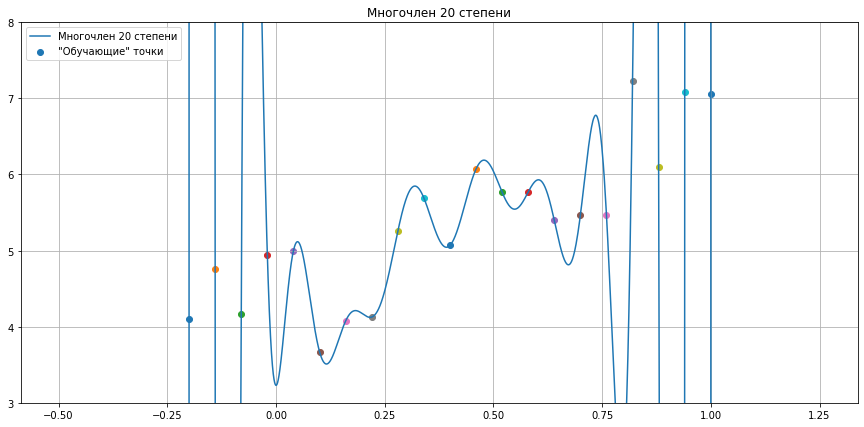

In [42]:
x = numpy.linspace(-0.5, 1.25, 100000)
y = 0
plt.figure(num=1, figsize=(15, 7))
plt.title("Многочлен 20 степени")
plt.grid()
plt.scatter(X_train[0], y_train[0], label='"Обучающие" точки')
for i in range (1, n):
    plt.scatter(X_train[i], y_train[i])
for i in range (n):
    y += a[n-i-1]*(x**i)
plt.plot(x, y, label='Многочлен 20 степени')
plt.ylim(3, 8)
plt.legend()
plt.show()

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

Коэффиценты многочленов выведены от младшей степени к старшей.
Многочлен 1 степени:
4.433230905064935
2.2791344980519463
Среднеквадратичная ошибка на обучающих данных равна: [0.29689663]
Среднеквадратичная ошибка на тестовых данных равна: [0.4351202]
Многочлен 2 степени:
4.472476503404163
1.1578316883597108
1.4016285121152716
Среднеквадратичная ошибка на обучающих данных равна: [0.26969892]
Среднеквадратичная ошибка на тестовых данных равна: [0.35647629]
Многочлен 3 степени:
4.460736355285089
1.0650161052850273
1.859750837261223
-0.3817686042882147
Среднеквадратичная ошибка на обучающих данных равна: [0.26949719]
Среднеквадратичная ошибка на тестовых данных равна: [0.35534646]
Многочлен 4 степени:
4.3411661203997
1.1718023926319006
6.794091784356866
-13.051328119984333
7.918474697316313
Среднеквадратичная ошибка на обучающих данных равна: [0.26106653]
Среднеквадратичная ошибка на тестовых данных равна: [0.44172702]
Многочлен 5 степени:
4.431297813822219
-0.13059803987339613
3.274714401

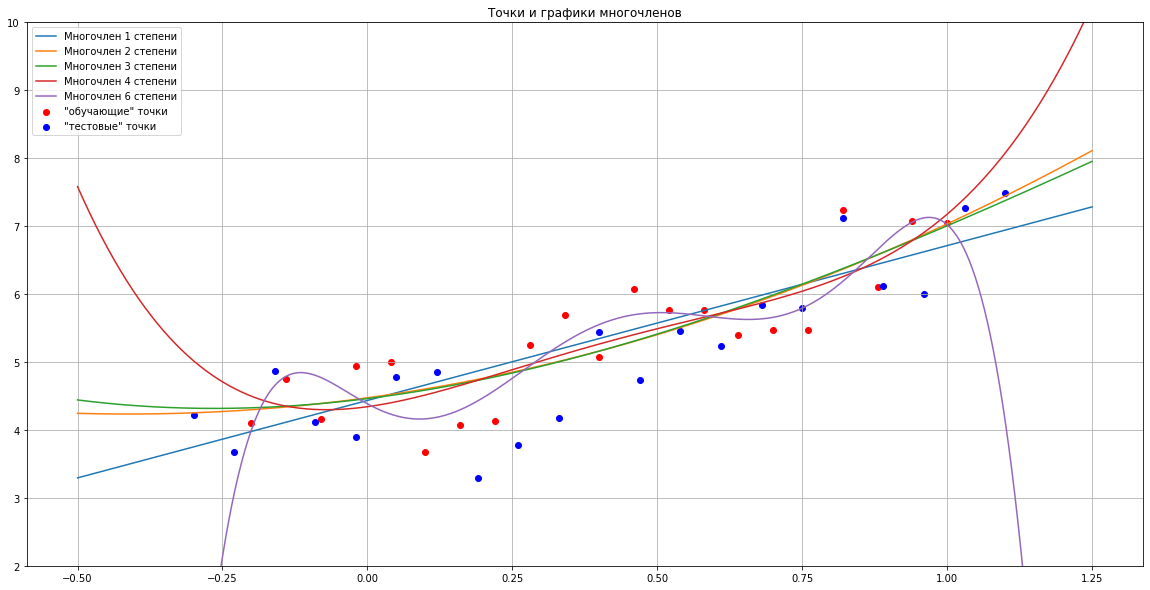

In [43]:
plt.figure(num=1, figsize=(20, 10))
plt.title('Точки и графики многочленов')
plt.scatter(X_train[0], y_train[0], c='red', label='"обучающие" точки')
plt.scatter(X_test[0], y_test[0], c='blue', label='"тестовые" точки')
for i in range (1, n):
    plt.scatter(X_train[i], y_train[i], c='red')
for i in range (1, n):
    plt.scatter(X_test[i], y_test[i], c='blue')
plt.grid()
print('Коэффиценты многочленов выведены от младшей степени к старшей.')
base_train = numpy.ones((numpy.size(X_train), 1))
base_test = numpy.ones((numpy.size(X_test), 1))
degree_train = numpy.array([X_train]).T
degree_test = numpy.array([X_test]).T
for k in range (1, 11):
    mistake_train = 0
    mistake_test = 0
    base_train = numpy.concatenate((degree_train, base_train), axis=1)
    base_test = numpy.concatenate((degree_test, base_test), axis=1)
    f_k = (sla.inv((base_train.T).dot(base_train)).dot(base_train.T)).dot(numpy.array([y_train]).T)
    print('Многочлен', k, 'степени:')
    for i in range (k, -1, -1):
        print(f_k[i, 0])
    for i in range (numpy.size(X_train)):
        temp = 0
        for j in range (k+1):
            temp += f_k[j]*base_train[i, j]
        temp -= y_train[i]
        mistake_train += temp**2
    for i in range (numpy.size(X_test)):
        temp = 0
        for j in range (k+1):
            temp += f_k[j]*base_test[i, j]
        temp -= y_test[i]
        mistake_test += temp**2
    degree_train *= numpy.array([X_train]).T
    degree_test *= numpy.array([X_test]).T
    print('Среднеквадратичная ошибка на обучающих данных равна:', mistake_train/numpy.size(X_train))
    print('Среднеквадратичная ошибка на тестовых данных равна:', mistake_test/numpy.size(X_test))
    if (k >= 1 and k <= 4) or k == 6:
        x = numpy.linspace(-0.5, 1.25, 1000)
        f_k = numpy.squeeze(f_k.T)
        y = 0
        s = 'Многочлен '+str(k)+' степени'
        for i in range (k+1):
            y += f_k[k-i]*(x**i)
        plt.plot(x, y, label=s)
    plt.ylim(2, 10)
    plt.legend()       

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

**Мой ответ:** С ростом степени многочлена ошибка на тренировочных данных, действительно, уменьшается, и кажется, что все хорошо. На самом деле это не так, поскольку мы подогнали модель под тренировочные данные, а на любых других модель может дать совершенно другой результат, совсем не такой, какой хотелось бы. Действительно, на тестовых данных с ростом степени многочлена ошибка растет все больше и больше, а при k = 10 и вовсе достигает значения ~14.6, что очень много по сравнению с ошибкой на тренировочных данных. Это объясняется тем, что на одном наборе точек, под который мы подогнали модель (точнее говоря, на основе которого она и была построена) ошибка невелика, но на другом наборе точек ошибка может быть огромной, поскольку теряется точность - на новом наборе модель уже не показывает зависимости между точками. В итоге наблюдаем эффект переобучения модели.

### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [44]:
text = open('flats_moscow_mod.txt')
next(text)
text = numpy.loadtxt(text, delimiter='\t')
price = text[:,0]
n = numpy.size(price)
price = numpy.array([price]).T
totsp = numpy.array([text[:,1]]).T
livesp = numpy.array([text[:,2]]).T
kitsp = numpy.array([text[:,3]]).T
dist = numpy.array([text[:,4]]).T
metrdist = numpy.array([text[:,5]]).T
X_matrix = numpy.concatenate((metrdist, numpy.ones((n, 1))), axis=1)
X_matrix = numpy.concatenate((dist, X_matrix), axis=1)
X_matrix = numpy.concatenate((kitsp, X_matrix), axis=1)
X_matrix = numpy.concatenate((livesp, X_matrix), axis=1)
X_matrix = numpy.concatenate((totsp, X_matrix), axis=1)
pseudo = numpy.squeeze((sla.inv((X_matrix.T).dot(X_matrix)).dot(X_matrix.T)).dot(price))
print('Регрессионные коэффиценты:')
print('Коэффицент перед totsp: ', pseudo[0])
print('Коэффицент перед livesp: ', pseudo[1])
print('Коэффицент перед kitsp: ', pseudo[2])
print('Коэффицент перед dist: ', pseudo[3])
print('Коэффицент перед metrdist: ', pseudo[4])
print('Коэффицент перед свободным членом: ', pseudo[5])

Регрессионные коэффиценты:
Коэффицент перед totsp:  1.4870528861258423
Коэффицент перед livesp:  1.6562890012269558
Коэффицент перед kitsp:  1.8192049792747866
Коэффицент перед dist:  -3.3271540562740745
Коэффицент перед metrdist:  -1.3156886037015991
Коэффицент перед свободным членом:  -26.78926963418577


**Мой ответ:** Смысл знаков следующий - они определяют, какой вклад несет признак в стоимость квартиры, т.е. является ли признак "хорошим" или "плохим". Чем больше "хороший" признак (к примеру, площади квартиры), тем больше стоит квартира, и наоборот, если сильно выражен "плохой" признак (удаленность от центра и метро), тем ниже стоимость квартиры. Именно поэтому "хорошие" признаки идут со знаком "+", а "плохие" - со знаком "-". Так что могу сказать, что модель согласуется с моими представлениями о жизни и даже отражает ситуацию на рынке квартир. 

In [45]:
price = numpy.squeeze(price)
k = numpy.size(pseudo)
mistake = 0
for i in range (n):
    temp = 0
    for j in range (k):
        temp += pseudo[j]*X_matrix[i, j]
    temp -= price[i]
    mistake += temp**2
print('Среднеквадратичная ошибка равна:', mistake/n, sep='\n')

Среднеквадратичная ошибка равна:
924.0090032083986


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

In [46]:
price = numpy.array([price]).T
my_matrix = numpy.concatenate((dist*metrdist, X_matrix), axis=1) # new model
my_matrix = numpy.concatenate((kitsp*metrdist, my_matrix), axis=1)
my_matrix = numpy.concatenate((metrdist*metrdist, my_matrix), axis=1)
my_matrix = numpy.concatenate((numpy.log(livesp), my_matrix), axis=1)
my_matrix = numpy.concatenate((numpy.log(metrdist), my_matrix), axis=1)
my_matrix = numpy.concatenate((numpy.cos(kitsp), my_matrix), axis=1)
my_matrix = numpy.concatenate((numpy.cos(metrdist), my_matrix), axis=1)
my_matrix = numpy.concatenate((numpy.tan(numpy.ones((n, 1))), my_matrix), axis=1)
coeffs = numpy.squeeze((sla.inv((my_matrix.T).dot(my_matrix)).dot(my_matrix.T)).dot(price))
print('Коэффиценты перед признаками (слева направо):')
for coeff in coeffs:
    print(coeff)
price = numpy.squeeze(price)
n = numpy.size(price)
k = numpy.size(coeffs)
mistake = 0
for i in range (n):
    temp = 0
    for j in range (k):
        temp += coeffs[j]*my_matrix[i, j]
    temp -= price[i]
    mistake += temp**2
print('Среднеквадратичная ошибка моей модели равна:', mistake/n, sep='\n')

Коэффиценты перед признаками (слева направо):
-589.3133850097656
-2.4381685419852057
-1.3556586986048087
2.276186773020388
-446.70866961486524
0.1432230349917821
-0.12005495484674684
0.060382915467293394
1.3336890659373346
10.51734271795253
3.1229659549362094
-3.7396505534553537
-3.806763288369288
2200.706085205078
Среднеквадратичная ошибка моей модели равна:
816.1084579679225


In [47]:
from sklearn.model_selection import train_test_split
# n = numpy.size(y_train)
# k = X_matrix.shape[1]
percent_better = 0
min_improve = 100000
max_improve = 0
average_mistake = 0
for z in range (1000): # прогоним на 1000 сидах
    X_train, X_test, y_train, y_test = train_test_split(X_matrix, price)
    first_model = numpy.squeeze((sla.inv((X_train.T).dot(X_train)).dot(X_train.T)).dot(y_train))
    ############## улучшение
    my_train = numpy.concatenate((numpy.array([X_train[:,2]]).T*numpy.array([X_train[:,1]]).T, X_train), axis=1)
    my_train = numpy.concatenate((numpy.array([X_train[:,3]]).T*numpy.array([X_train[:,1]]).T, my_train), axis=1)
    my_train = numpy.concatenate((numpy.array([X_train[:,1]]).T*numpy.array([X_train[:,1]]).T, my_train), axis=1)
    my_train = numpy.concatenate((numpy.log(numpy.array([X_train[:,4]]).T), my_train), axis=1)
    my_train = numpy.concatenate((numpy.log(numpy.array([X_train[:,1]]).T), my_train), axis=1)
    my_train = numpy.concatenate((numpy.cos(numpy.array([X_train[:,3]]).T), my_train), axis=1)
    my_train = numpy.concatenate((numpy.cos(numpy.array([X_train[:,1]]).T), my_train), axis=1)
    my_train = numpy.concatenate((numpy.tan(numpy.array([X_train[:,0]]).T), my_train), axis=1)
    ############## улучшение
    second_model = numpy.squeeze((sla.inv((my_train.T).dot(my_train)).dot(my_train.T)).dot(y_train))
    first_mistake = 0
    second_mistake = 0
    y_test = numpy.squeeze(y_test)
    for i in range (numpy.size(y_test)): # mistake of the first model
        temp = 0
        for j in range (X_test.shape[1]):
            temp += first_model[j]*X_test[i, j]
        temp -= y_test[i]
        first_mistake += temp**2
    first_mistake /= numpy.size(y_test)
    ################## улучшение
    new_test = numpy.concatenate((numpy.array([X_test[:,2]]).T*numpy.array([X_test[:,1]]).T, X_test), axis=1)
    new_test = numpy.concatenate((numpy.array([X_test[:,3]]).T*numpy.array([X_test[:,1]]).T, new_test), axis=1)
    new_test = numpy.concatenate((numpy.array([X_test[:,1]]).T*numpy.array([X_test[:,1]]).T, new_test), axis=1)
    new_test = numpy.concatenate((numpy.log(numpy.array([X_test[:,4]]).T), new_test), axis=1)
    new_test = numpy.concatenate((numpy.log(numpy.array([X_test[:,1]]).T), new_test), axis=1)
    new_test = numpy.concatenate((numpy.cos(numpy.array([X_test[:,3]]).T), new_test), axis=1)
    new_test = numpy.concatenate((numpy.cos(numpy.array([X_test[:,1]]).T), new_test), axis=1)
    new_test = numpy.concatenate((numpy.tan(numpy.array([X_test[:,0]]).T), new_test), axis=1)
    ################## улучшение
    for i in range (numpy.size(y_test)): # mistake of the second model
        temp = 0
        for j in range (new_test.shape[1]):
            temp += second_model[j]*new_test[i, j]
        temp -= y_test[i]
        second_mistake += temp**2
    second_mistake /= numpy.size(y_test)
    if second_mistake < first_mistake:
        percent_better += 1
    if second_mistake > max_improve:
        max_improve = second_mistake
    if second_mistake < min_improve:
        min_improve = second_mistake
    average_mistake += second_mistake
average_mistake /= 1000
print('На сколько моя модель лучше исходной (в % от количества тестов):', percent_better/10, '%')
print('Минимальная среднеквадратичная ошибка моей модели:', min_improve)
print('Усредненная среднеквадратичная ошибка моей модели:', average_mistake)
print('Максимальная среднеквадратичная ошибка моей модели:', max_improve)

На сколько моя модель лучше исходной (в % от количества тестов): 98.1 %
Минимальная среднеквадратичная ошибка моей модели: 496.55653109217184
Усредненная среднеквадратичная ошибка моей модели: 753.1174438021962
Максимальная среднеквадратичная ошибка моей модели: 1257.3084709863297


**Вывод:** Сначала расскажу, как я пришла именно к такому набору признаков. Сперва я попробовала попарно перемножать несколько признаков (что, в общем-то, логично - для стоимости квартиры может иметь большое значение именно сочетание нескольких признаков, к примеру, сочетание удаленности от метро и от центра). Осознав, что это принесло положительный результат (а добавление еще попарных перемножений ни к чему не привело), я решила пойти дальше и добавила логарифмов для избавления от степенных зависимостей - стало лучше, но меня пока не устроило. И тогда я решила добавить косинус, а потом тангенс от свободного признака и получила отличный, по моему мнению, результат. Далее приведу данные, которые могут незначительно варьироваться в зависимости от датасета:

Среднее значение ошибки моей модели - 750$\pm$5. В ~98% случаев моя модель оказывается эффективнее исходной.

Последующие попытки добавить еще функций: многочленов, корней, логарифмов, тригонометрических функций либо ухудшали модель, либо не давали заметного улучшения, поэтому я решила, что тот набор признаков, на котором я остановилась, улучшить уже нельзя.

### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы &mdash; необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них &mdash; регуляризация. Сейчас мы рассмотрим одну из её разновидностей &mdash; **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ &mdash; некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

In [48]:
data_train = numpy.loadtxt('train.txt', delimiter=',')
data_test = numpy.loadtxt('test.txt', delimiter=',')
X_train = data_train[:,0]
y_train = data_train[:,1]
X_test = data_test[:,0]
y_test = data_test[:,1]

**Пояснение решения:** Найдем $\lambda$ с помощью простого перебора. Для этого установим некоторый диапазон возможных значений: [-100; 100] вполне подойдет. Будем прибавлять шаг 0.001 каждый раз и пробежим все значения интервала с такой точностью. Таким образом, найдем такое значение $\lambda$, при котором ошибка на тестовых данных минимальна. 

In [49]:
n = numpy.size(X_train)
X_ones = numpy.ones((numpy.size(X_train), 1))
base = numpy.array([X_train]).T
X = numpy.concatenate((base, X_ones), axis=1)
for i in range (5):
    base *= numpy.array([X_train]).T
    X = numpy.concatenate((base, X), axis=1)

base = numpy.array([X_test]).T
testing_X = numpy.concatenate((base, X_ones), axis=1)
for i in range (5):
    base *= numpy.array([X_test]).T
    testing_X = numpy.concatenate((base, testing_X), axis=1)

E = numpy.eye(X.shape[1])
Lambda = 0
count = -100
min_mistake = 2.6
while count < 100:
    mistake = 0
    coeffs = numpy.squeeze((sla.inv((X.T).dot(X) + count*E).dot(X.T)).dot(numpy.array([y_train]).T))
    for i in range (n): # смотрим ошибку на тестовых данных
        temp = 0
        for j in range (X.shape[1]):
            temp += coeffs[j]*testing_X[i, j]
        temp -= y_test[i]
        mistake += temp**2
    mistake /= n
    if mistake < min_mistake:
        min_mistake = mistake
        Lambda = count
    count += 0.001
print('Найденный параметр lambda равен:', Lambda)
print('Ошибка на многочлене 6-ой степени на тестовой выборке с регуляризацией с данной lambda равна:', min_mistake)

Найденный параметр lambda равен: 1.1580000001134212
Ошибка на многочлене 6-ой степени на тестовой выборке с регуляризацией с данной lambda равна: 0.30734409331865603


**Вывод:** Вспомним, что ошибка на многочлене оптимальной степени (т.е. 3-ей - на ней ошибка минимальна) без регрессии равна 0.35534646. Действительно, полученная ошибка получилась меньше, чем это число, что свидетельствует о том, $\lambda$ была подобрана хорошо. 

Теперь сравним определители:

In [50]:
print(sla.det((X.T).dot(X)))
print(sla.det((X.T).dot(X) + Lambda*E))

9.082864838914274e-12
1012.5548475007569


**Вывод сравнения двух определителей:** $\det(X^TX)$ не очень велик и достаточно близок к нулю, а $\det(X^TX + \lambda E)$ с подобранной $\lambda$ получился значительно больше. Таким образом, если стоит проблема вырожденности $X^TX$, можно прибегнуть к регуляризации и избавиться от этой проблемы.

Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

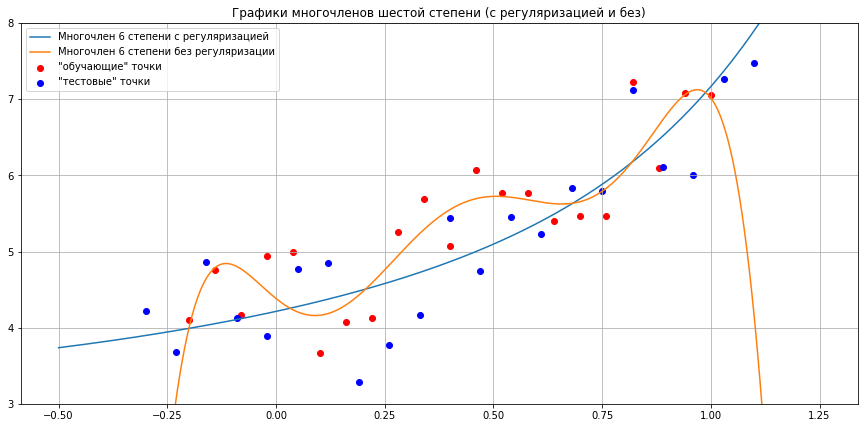

In [51]:
plt.figure(num=1, figsize=(15, 7))
plt.title("Графики многочленов шестой степени (с регуляризацией и без)")
plt.grid()
plt.scatter(X_train[0], y_train[0], c='red', label='"обучающие" точки')
plt.scatter(X_test[0], y_test[0], c='blue', label='"тестовые" точки')
for i in range (1, n):
    plt.scatter(X_train[i], y_train[i], c='red')
for i in range (1, n):
    plt.scatter(X_test[i], y_test[i], c='blue')

coeffs_with = numpy.squeeze((sla.inv((X.T).dot(X) + Lambda*E).dot(X.T)).dot(numpy.array([y_train]).T))
x = numpy.linspace(-0.5, 1.25, 100000)
y = 0
for i in range (7):
    y += coeffs_with[6-i]*(x**i)
plt.plot(x, y, label='Многочлен 6 степени с регуляризацией')

coeffs_without = numpy.squeeze((sla.inv((X.T).dot(X)).dot(X.T)).dot(numpy.array([y_train]).T))
x = numpy.linspace(-0.5, 1.25, 100000)
y = 0
for i in range (7):
    y += coeffs_without[6-i]*(x**i)
plt.plot(x, y, label='Многочлен 6 степени без регуляризации')

plt.ylim(3, 8)
plt.legend()
plt.show()

**Вывод:** модель с регуляризацией меньше подстраивается под обучающие данные (видно из графика: график многочлена без регуляризации подходит к обучающим точкам почти вплотную), таким образом снижая ошибку на тестовых данных.

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение напишите прямо здесь**

$$
f(a)=|Xa - y|^2 + \lambda|a|^2 = (Xa-y)^{T}(Xa-y)+\lambda a^{T}a \rightarrow\min
$$

Найдем производную этой функции, тогда искомый $a$ будет решением уравнения $f'(a)=0$.

Для начала выпишем некоторые стандартные производные, к которым будем сводить более сложные:

1) $\frac{\partial}{\partial a}a^{T}Xa = 2Xa$ (следует из определения градиента)

2) $\frac{\partial}{\partial a}a^{T}y=\frac{\partial}{\partial a}y^{T}a = y$ (также следует из определения градиента)

Вернемся к нашей производной:

$
\frac{\partial}{\partial a}(Xa-y)^{T}(Xa-y)+\lambda a^{T}a = \frac{\partial}{\partial a}\left(a^{T}X^{T}Xa-y^{T}Xa-a^{T}X^{T}y+y^{T}y+\lambda a^{T}a\right)
$

Рассмотрим все производные-слагаемые по отдельности:

$
1) \frac{\partial}{\partial a}a^{T}X^{T}Xa =  \frac{\partial}{\partial a}a^{T}(X^{T}X)a = 2X^{T}Xa, \text{ поскольку } \frac{\partial}{\partial a}a^{T}Xa = (X+X^{T})a
$

$
2) \frac{\partial}{\partial a}\left(y^{T}Xa\right) = \frac{\partial}{\partial a}\left((X^{T}y)^{T}a\right) = X^{T}y
$

$
3) \frac{\partial}{\partial a}a^{T}X^{T}y = \frac{\partial}{\partial a}a^{T}(X^{T}y) = X^{T}y
$

$
4) \frac{\partial}{\partial a}y^{T}y = 0
$

$
5) \frac{\partial}{\partial a}\lambda a^{T}a = 2\lambda a, \text{ поскольку берем производную от вектора, компоненты которого имеют вид }(a_i)^2
$

Тогда имеем:

$$
\frac{\partial}{\partial a}(Xa-y)^{T}(Xa-y)+\lambda a^{T}a = 2X^{T}Xa-2X^{T}y+2\lambda a = 0 \Rightarrow (X^{T}X+\lambda E)a = X^{T}y \Rightarrow a = (X^{T}X+\lambda E)^{-1}X^{T}y, \text{ что и требовалось доказать.}
$$

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Введём обозначения $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Описание вашего алгоритма напишите прямо здесь**

В задании, скорее всего, опечатка - правильно $X_{(t)} = (x_1\ldots x_t)^{T}$, иначе размер будет зависеть от t.

$X^T_{(t+1)}X_{(t+1)}$ имеет размер $n x n$ (пусть число компонент $x_i = n$).

Рассмотрим элемент новой матрицы $M = X^T_{(t+1)}X_{(t+1)}: M_{ij} = \sum_{k=1}^{t+1}(X^{T})_{ik}X_{kj} = \sum_{k=1}^{t}(X^{T})_{ik}X_{kj} + (X^{T})_{i, t+1}X_{t+1, j}$

Заметим, что $\sum_{k=1}^{t}(X^{T})_{ik}X_{kj}$ нам известна (нам известно значение $X^T_{(t)}X_{(t)}$) и от t не зависит, и таких элементов $M_{ij}$ нужно посчитать $n^2$ штук. Тогда сложность алгоритма будет $O(n^2)$.

Теперь рассмотрим вторую матрицу. Назовем ее $N = X^T_{(t+1)}y_{(t+1)}$. Тогда $N_{ij} = \sum_{k=1}^{t+1}(X^{T})_{ik}y_{k} = \sum_{k=1}^{t}(X^{T})_{ik}y_{k} + (X^{T})_{i, t+1}y_{t+1}$ Всего n вычислений для матрицы $N$, сложность $O(n)$.

Итоговая сложность алгоритма: $O(n^2)$.

**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

In [ ]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)


for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    # your code goes here
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        # your code goes here
        y_pred = #...
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ &mdash; матрица с ортонормированными столбцами, а $R$ &mdash; верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ &mdash; столбцы матрицы $A$, $q_1,\ldots,q_t$ &mdash; столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ &mdash; это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.